In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

# Данные

Данные содержат информацию о различных погодных условиях утром и влажности вечером.

Утренние данные будут использованы для прогнозирования уровня влажности вечером.

In [ ]:
data = pd.read_csv('./daily_weather.csv')

In [ ]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [ ]:
del data['number']

In [ ]:
data = data.dropna()

Далее влажность преобразована в 2 класса: высокую (1) и низкую (0), чтобы позволить провести классификацию.

In [ ]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >24.99) *1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [ ]:
y = clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [ ]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [ ]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [ ]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

# Построение модели

In [ ]:
humidity_classifier = tree.DecisionTreeClassifier(max_depth=3)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predicted = humidity_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
y_test['high_humidity_label'][:10]

110    0
716    0
766    1
654    0
926    0
344    1
833    0
94     1
688    0
258    0
Name: high_humidity_label, dtype: int64

In [ ]:
accuracy_score(y_test,y_predicted)*100

85.90225563909775

[Text(0.5, 0.875, 'relative_humidity_9am <= 23.284\ngini = 0.5\nsamples = 532\nvalue = [261, 271]'),
 Text(0.25, 0.625, 'air_pressure_9am <= 918.825\ngini = 0.217\nsamples = 266\nvalue = [233, 33]'),
 Text(0.125, 0.375, 'relative_humidity_9am <= 21.196\ngini = 0.444\nsamples = 78\nvalue = [52, 26]'),
 Text(0.0625, 0.125, 'gini = 0.382\nsamples = 66\nvalue = [49, 17]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.375, 0.375, 'relative_humidity_9am <= 20.533\ngini = 0.072\nsamples = 188\nvalue = [181, 7]'),
 Text(0.3125, 0.125, 'gini = 0.034\nsamples = 173\nvalue = [170, 3]'),
 Text(0.4375, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.75, 0.625, 'relative_humidity_9am <= 31.75\ngini = 0.188\nsamples = 266\nvalue = [28, 238]'),
 Text(0.625, 0.375, 'air_temp_9am <= 51.107\ngini = 0.451\nsamples = 61\nvalue = [21, 40]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6875, 0.125, 'gini = 0.428\nsamples = 58\nvalue =

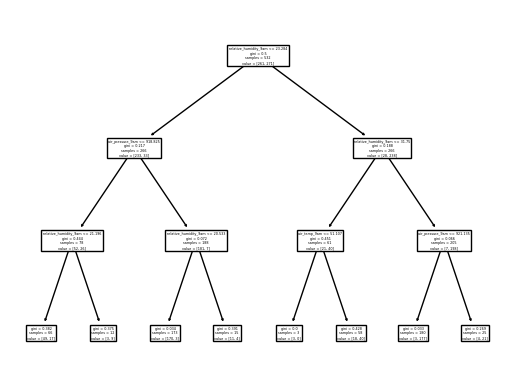

In [ ]:
tree.plot_tree(humidity_classifier, feature_names = morning_features)